Logistic Regression on Building_01 Data from T_315500_234500_NW.bin


In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
df = pd.read_csv('building_01.csv')
df1 = df.dropna() 
df2 = df1.values

In [ ]:
#Reading CSV File #2, Building_0000001 txt 
df_a = pd.read_csv('Buildings_000001.txt',sep = ' ')
df_a1 = df_a.dropna() 
df_a2 = df_a1.values

In [ ]:
#Checking to see if everything is working 
#df.info()
#df.head(3)
classifier_count = df['Classification'].value_counts().to_frame()
classifier_count.head(2)

df_a.info()
df_a.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73046 entries, 0 to 73045
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   //X                73046 non-null  float64
 1   Y                  73046 non-null  float64
 2   Z                  73046 non-null  float64
 3   R                  73046 non-null  int64  
 4   G                  73046 non-null  int64  
 5   B                  73046 non-null  int64  
 6   Point_Source_ID    73046 non-null  float64
 7   Scan_Angle_Rank    73046 non-null  float64
 8   Flightline_Edge    73046 non-null  float64
 9   Scan_Direction     73046 non-null  float64
 10  Number_of_Returns  73046 non-null  float64
 11  Return_Number      73046 non-null  float64
 12  Time               73046 non-null  float64
 13  Intensity          73046 non-null  float64
 14  Classification     73046 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 8.4 MB


,//X,Y,Z,R,G,B,Point_Source_ID,Scan_Angle_Rank,Flightline_Edge,Scan_Direction,Number_of_Returns,Return_Number,Time,Intensity,Classification
0,315714.395020,234789.835938,5.372,170,0,255,12.0,-20.0,0.0,1.0,1.0,1.0,392193.252301,269.0,2.0
1,315714.501953,234789.952148,5.374,170,0,255,12.0,-20.0,0.0,1.0,1.0,1.0,392193.252301,257.0,2.0
2,315714.610962,234790.070801,5.377,170,0,255,12.0,-20.0,0.0,1.0,1.0,1.0,392193.252301,256.0,2.0


In [ ]:
#I will use all the attributes (building_000000 CSV)
x = df2[:, :14] 
y = df2[:, 14]

print(x.shape,y.shape)

(1048575, 14) (1048575,)


In [ ]:
#For building 000001
x1 = df_a2[:, :14] 
y1 = df_a2[:, 14] 

In [ ]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)
print(x_train.shape, x_test.shape)

(786431, 14) (262144, 14)


In [ ]:
#Logistic Regression 
logreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)
#print(yhat_train)

#finding accuracy of applying model on training data
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy on train set:",accuracy_train)

#finding accuracy of applying model on test data 
yhat_test = logreg.predict(x_test)
#print(yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test set:",accuracy_test)

Accuracy on train set: 0.836234838148547
Accuracy on test set: 0.8357391357421875


In [ ]:
#finding accuracy of applying model to a different building 
yhat_building_000001 = logreg.predict(x1)
print(yhat_building_000001)
accuracy_building_000001 = accuracy_score(y1, yhat_building_000001)
print("Accuracy on a different building (01):",accuracy_building_000001)

[2. 2. 2. ... 2. 2. 2.]
Accuracy on a different building (01): 0.771869780686143


In [ ]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label=2)
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[ 1.33168943e-01 -5.66639073e-03 -4.14670885e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.13473004e+01  1.36102196e+00
  -2.30683218e-02  0.00000000e+00  6.79474947e+02 -4.63510373e+02
  -5.18829110e+01 -3.76354410e-01]]
Intercept: [124.58967354]
Precision: 0.8337591404140862
Recall: 0.9804099695236504
Fscore: 0.90115719528649


Confusion matrix, without normalization
[[195609   3960]
 [ 39100  23475]]
Normalized confusion matrix
[[0.98 0.02]
 [0.62 0.38]]


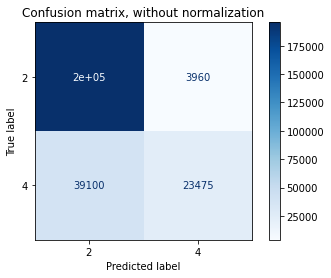

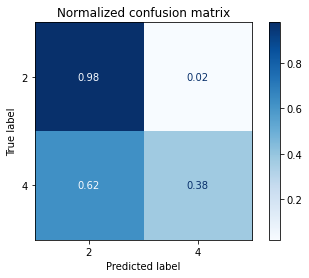

In [ ]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>